# Elevation vs Pitch Experiment

The goal in this experiment is to compare the effectiveness of the `elevation` channel in spatial audio and the `pitch` channel.

## Methodology

- A set of graphs are sonified using `TOPH` in two distinct ways. The x-axis is always represent by the `azimuth` or left / right channel in the `SpatialPanner`.
- The y-axis is either represented by the `pitch` or the `elevation`.

The user's are asked to identify the chart that coresponded with the sonification they heard from a set.

The coresponding chart can be presented as a visual chart for non-BVI individuals, and screen reader descriptions for BVI individuals.

I chose to implement the former below;

In [1]:
    from toph.audio.playable import Chain,SineWave, Silence, Wave
    from toph.audio.spatial import SpatialPanner
    from toph.audio.stage import AudioStage
    from toph.axis.spatial import LinearSpatialAxis

    import matplotlib.pyplot as plt

    AUDIO_PATH = "assets/ding.wav"

    def ax_gen(domain, range_):

        do_scale = max(domain) - min(domain)
        ra_scale = max(range_) - min(range_)

        def foo(dp):

            dx = dp - min(domain) 
            sdx = dx / do_scale 
            return min(range_) + sdx * ra_scale 

        return foo

    def sonify(xs, ys, mode, gaps=0.5, save=None):
        """
        """
        with AudioStage() as stage:

            space_ax = LinearSpatialAxis(
                domain=((min(xs), max(xs)), (min(ys), max(ys))),
                range_=((-50.0, 50.0), (-45.0, 90.0)),
            )

            #TODO: replace with linear axis when implemented
            lin_ax = ax_gen(
                domain=(min(ys), max(ys)),
                range_=(110, 880)
            )

            marks = []

            for x , y in zip(xs, ys):
                
                if mode == "full_spatial":

                    r, az, el = space_ax((x, y)) 

                    marks.extend([
                            Wave(AUDIO_PATH).add_effect(SpatialPanner(az, el, r)),
                            Silence(secs = gaps)
                    ])

                elif mode == "pitch":

                    # keep the y as 0 to get a good r
                    r, az, el = space_ax((x, 0.))
                    freq = lin_ax(y)

                    print(r, az, el, freq)
                    marks.extend([
                            SineWave(vol = 0.85, f = freq, secs=0.5).add_effect(SpatialPanner(az, 0. , r)),
                            Silence(secs = gaps)
                    ])

                elif mode == "both":
                    # keep the y as 0 to get a good r
                    r, az, el = space_ax((x, y))
                    freq = lin_ax(y)

                    marks.extend([
                            SineWave(vol = 0.85, f = freq, secs=0.5).add_effect(SpatialPanner(az, el , r)),
                            Silence(secs = gaps)
                    ])

            if save:
                stage.save(Chain(*marks), save)

            else:
                stage.play(Chain(*marks))

    def plot_four(datasets, idxs, show_correct = None):
        fig, axes = plt.subplots(2, 2, figsize=(8, 8))

        for i, ax in enumerate(axes.flat):
            ax.scatter(datasets[idxs[i]]["x"], datasets[idxs[i]]["y"])
            ax.set_title(f"Plot {i + 1}")
            ax.grid(True)

            if show_correct is not None:
                for spine in ax.spines.values():
                    if idxs[i] == show_correct:
                            spine.set_linewidth(2)
                            spine.set_color("green")
                    else:
                            spine.set_color("red")


        plt.tight_layout()

In [2]:
datasets = [
    {
        "x":[0, 10, 30, 40, 90],
        "y":[10, 15, 20, 15, 10]
    },
    {
        "x":[0, 10, 20, 30, 40],
        "y":[10, 15, 20, 15, 10]
    },
    {
        "x":[0, 10, 20, 40, 80, 160],
        "y":[20, 15, 20, 15, 10, 5]
    },
    {
        "x": [0, 5, 15, 30, 45, 60],
        "y": [12, 14, 19, 14, 11, 8]
    },
    {
        "x": [0, 20, 40, 60, 80, 100],
        "y": [15, 20, 25, 20, 15, 10]
    },
    {
        "x": [0, 15, 35, 55, 75, 95],
        "y": [10, 18, 16, 20, 15, 12]
    },
    {
        "x": [0, 12, 25, 50, 75, 100],
        "y": [8, 12, 18, 22, 18, 10]
    },
    {
        "x": [0, 25, 50, 75, 100, 125],
        "y": [20, 18, 22, 18, 14, 10]
    }
]


ALSA lib pcm.c:2666:(snd_pcm_open_noupdate) Unknown PCM dsnoop:0
ALSA lib pcm_dmix.c:999:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib pcm_oss.c:397:(_snd_pcm_oss_open) Cannot open device /dev/dsp
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib confmisc.c:160:(snd_config_get_card) Invalid field card
ALSA lib pcm_usb_stream.c:482:(_snd_pcm_usb_stream_open) Invalid card 'card'
ALSA lib pcm_dmix.c:999:(snd_pcm_dmix_open) unable to open slave


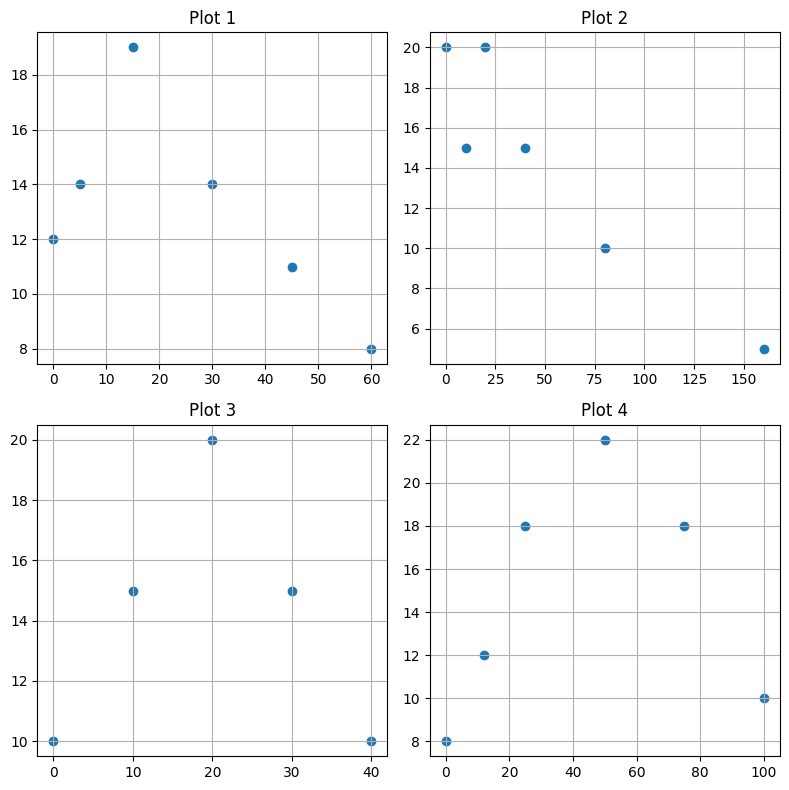

In [3]:
import random

sonify_idxs = random.sample(range(len(datasets)), 4) 

correct_one = sonify_idxs[random.randint(0, len(sonify_idxs) - 1)]
mode = "both" # full_spatial , pitch , both
sonify(datasets[correct_one]["x"],
        datasets[correct_one]["y"],
        mode=mode,
        save="test_audio.wav"
        )

plot_four(datasets, sonify_idxs)

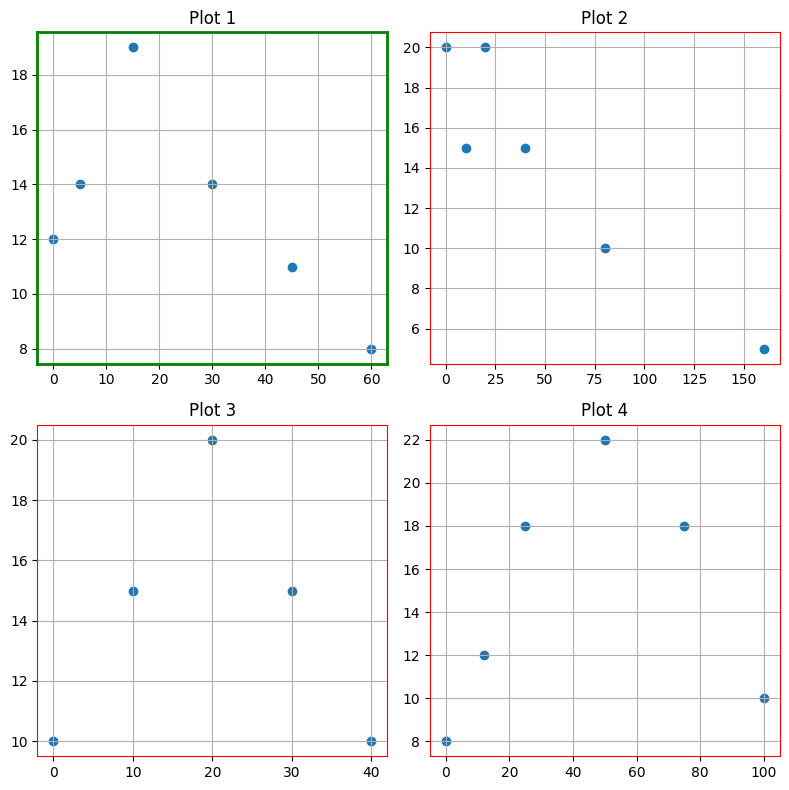

In [4]:
plot_four(datasets , sonify_idxs, correct_one)